データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('output_data.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape}') 

# 先頭行の出力
train.head()
# test.head()

Train shape: (690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


統計量の確認

In [2]:
train.describe(include='all')
# test.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


相関関係の確認

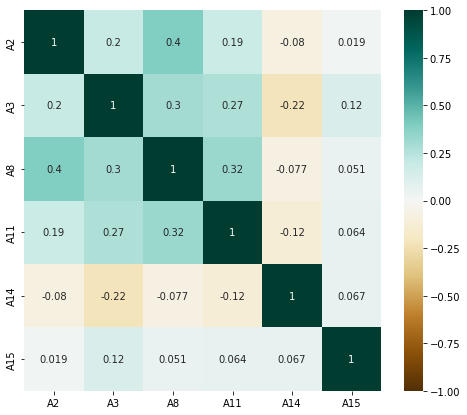

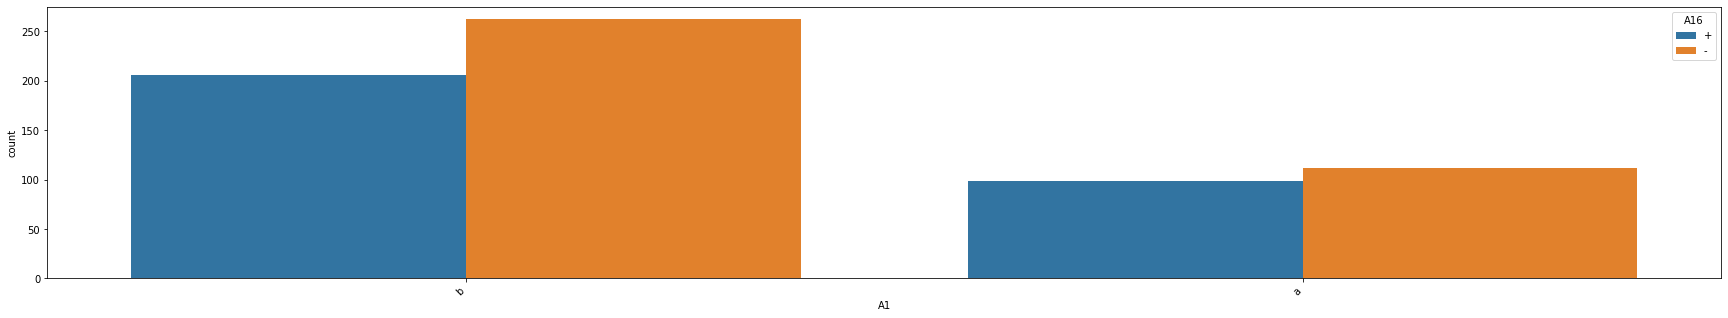

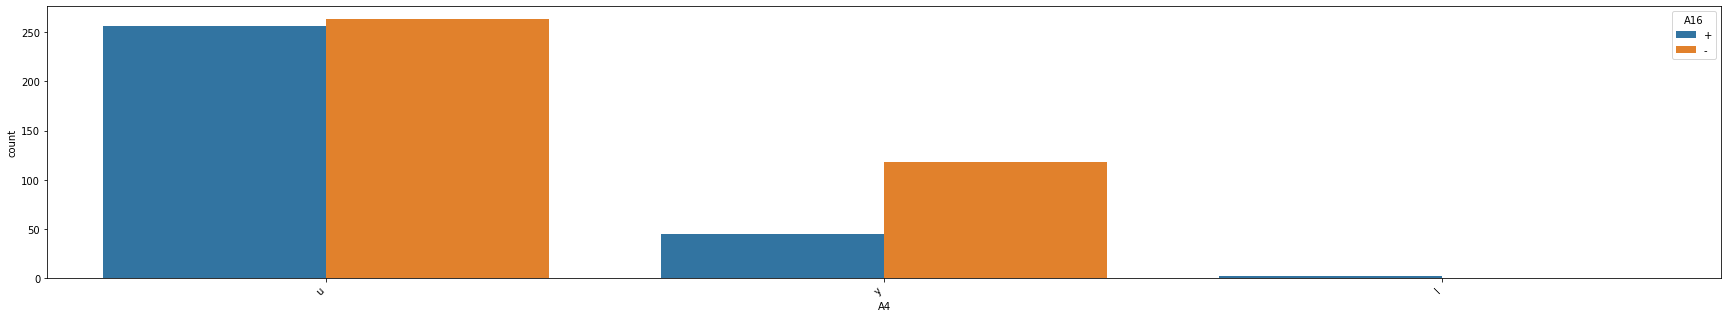

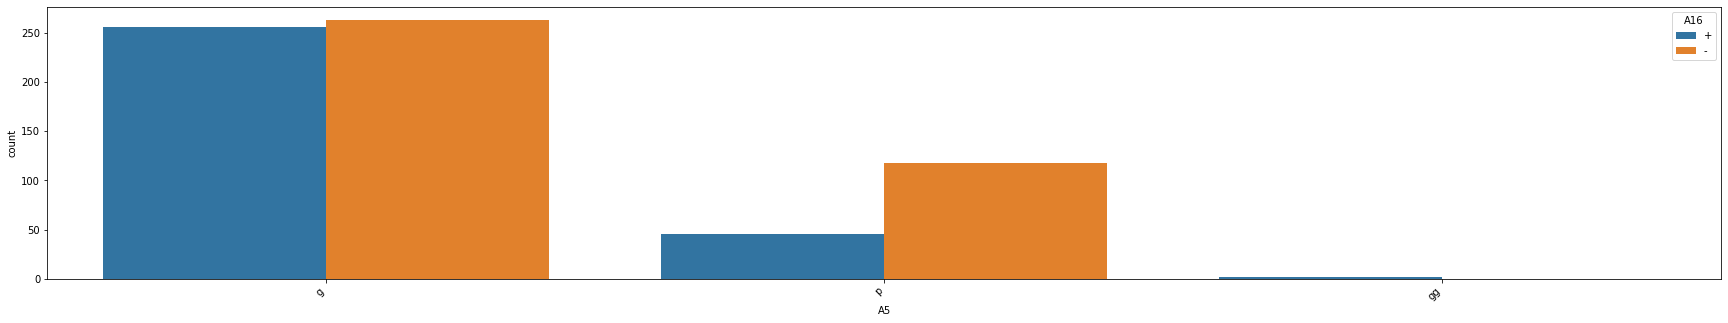

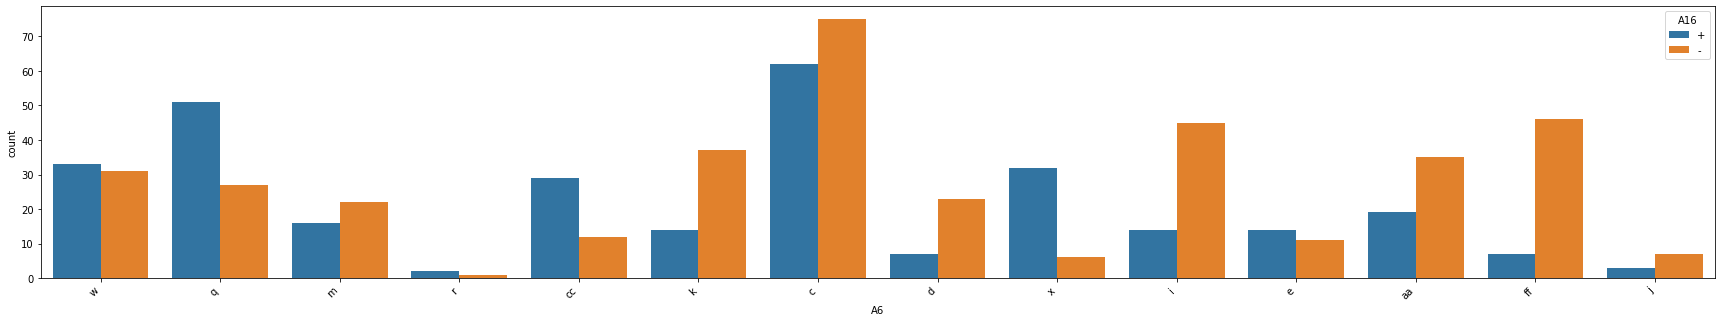

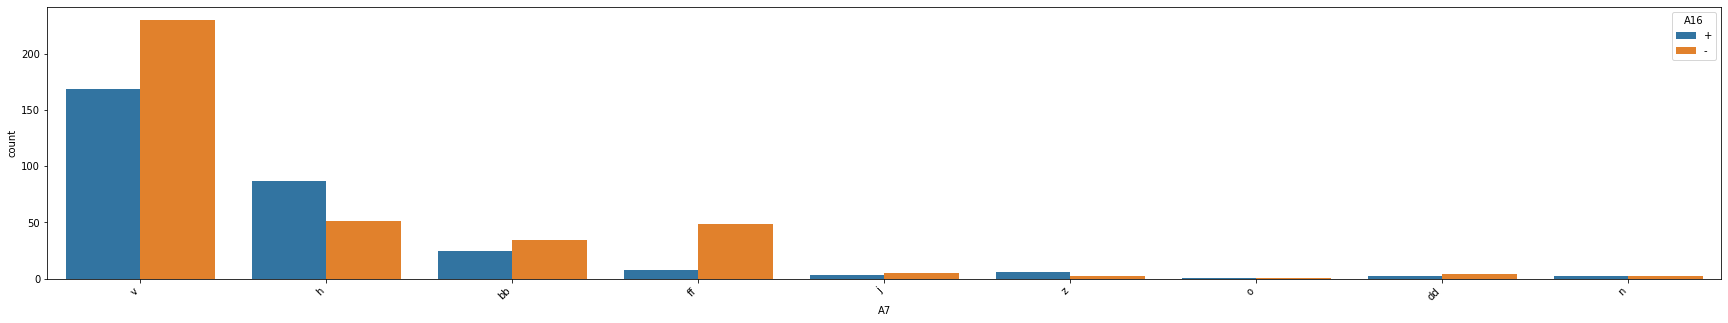

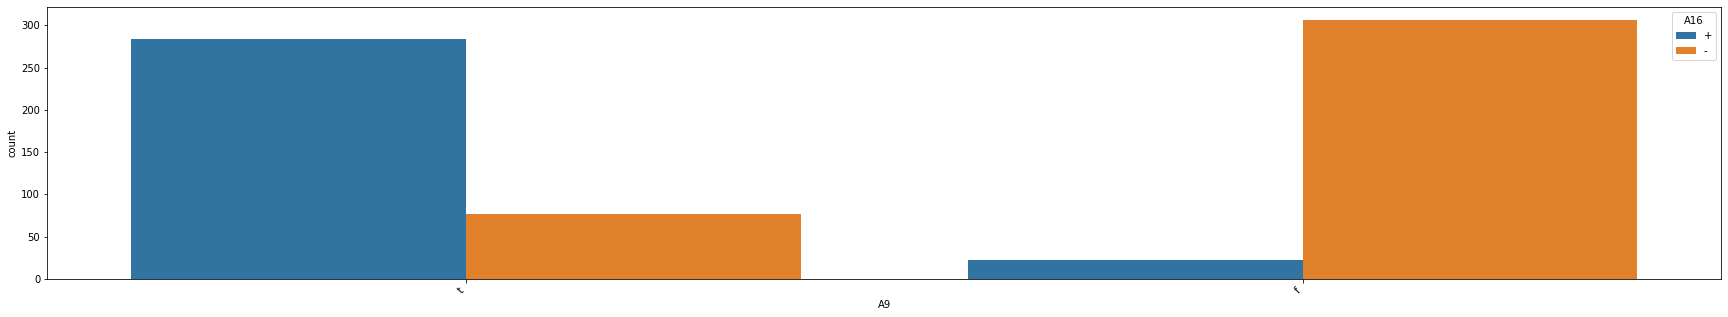

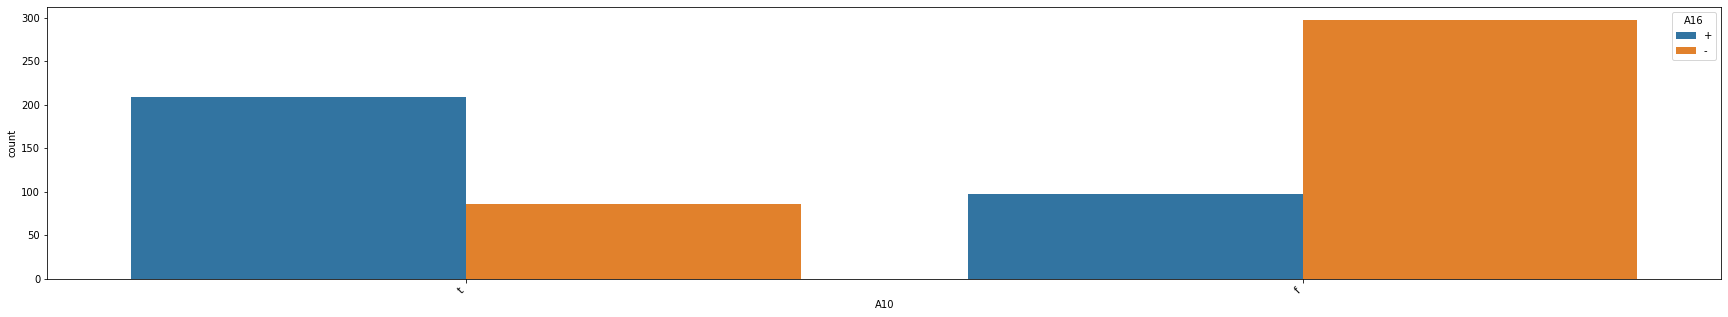

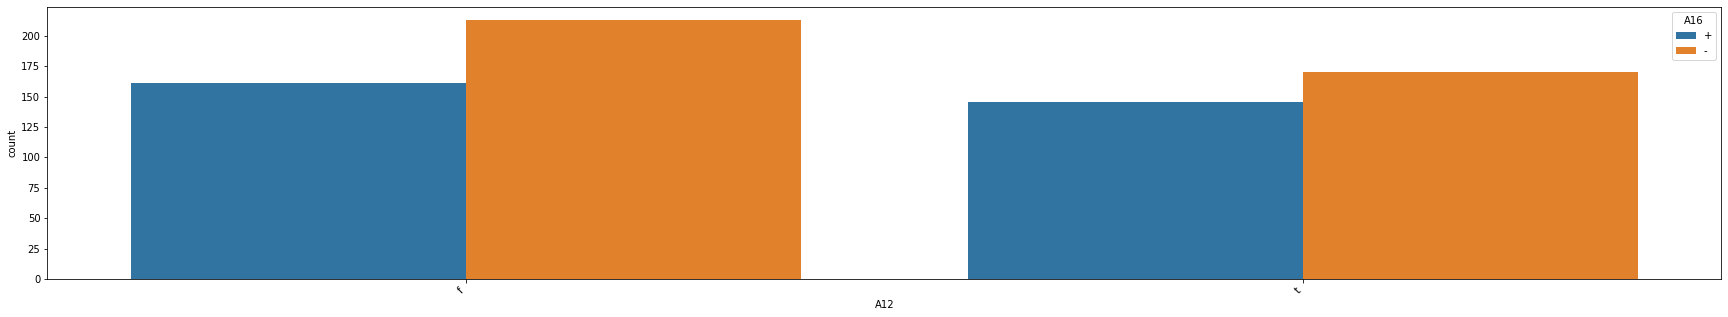

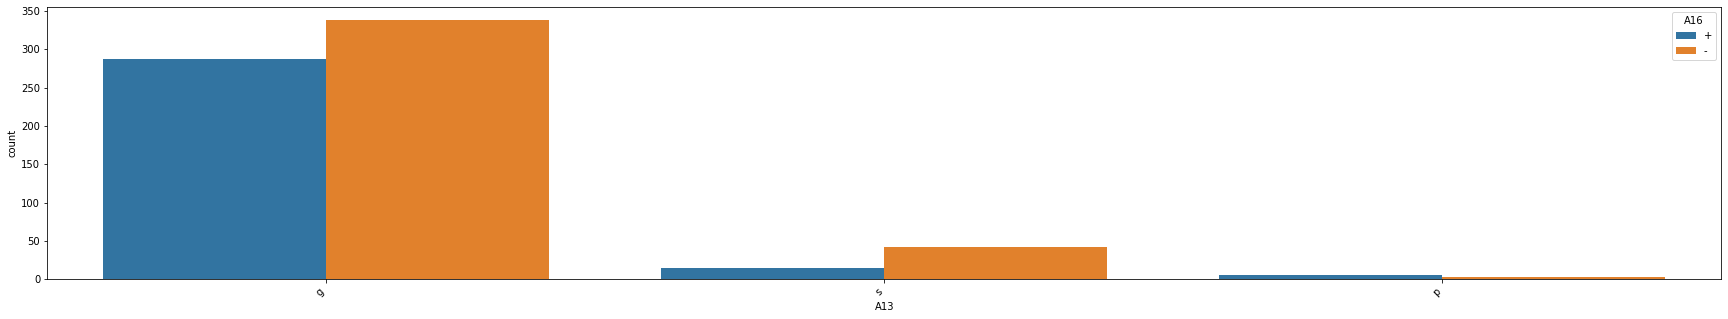

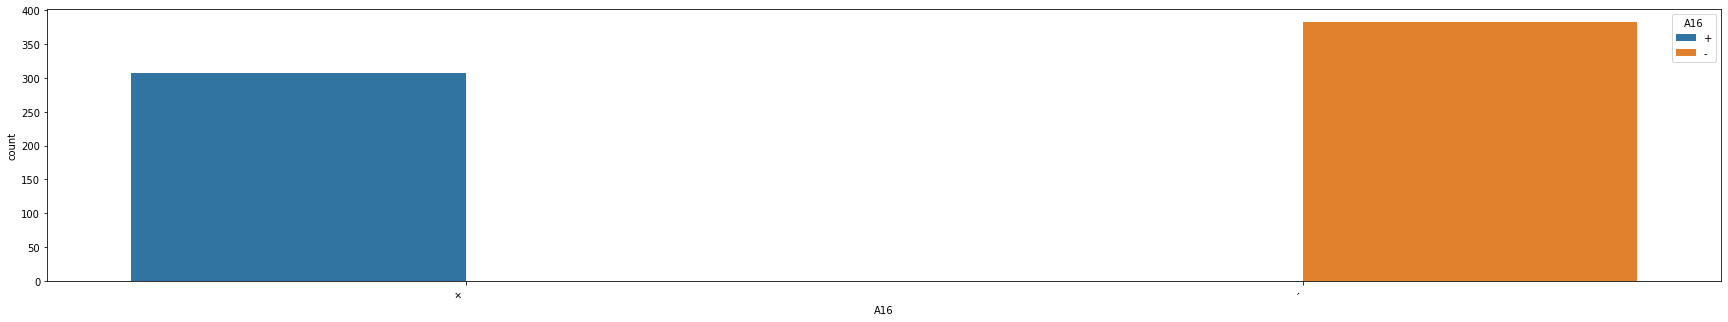

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

#カテゴリ変数とラベルの関係
categorical_feature = ['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16']
for feature_name in categorical_feature:
    fig = plt.figure(figsize=(30,5))
    plt.xticks(rotation=45, ha="right")
    ax = sns.countplot(x=feature_name, hue='A16', data=train)
    plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


前処理

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# 特徴量エンジニアリング
train = train.dropna(subset=['A1','A2', 'A4', 'A5', 'A6', 'A7', 'A14']) #欠損値があるカラムがあれば指定

# カテゴリカル変数の定義
multi_categorical_feature = ['A4', 'A5', 'A6', 'A7', 'A13']
binary_categorical_feature = ['A1', 'A9', 'A10', 'A12']
numerous_feature = ['A2', 'A3', 'A8','A11', 'A14', 'A15']

# 1. One-Hot Encoding for multi_categorical_feature
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
one_hot_encoded = one_hot_encoder.fit_transform(train[multi_categorical_feature])
df_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(multi_categorical_feature))
train = train.drop(columns=multi_categorical_feature).reset_index(drop=True)  # Drop original columns
train = pd.concat([train, df_one_hot], axis=1)  # Concatenate the one hot encoded columns

# 2. Ordinal Encoding for binary_categorical_feature
ordinal_encoder = OrdinalEncoder()
train[binary_categorical_feature] = ordinal_encoder.fit_transform(train[binary_categorical_feature])

# 3. Standard Scaling for numerous_feature
scaler = StandardScaler()
train[numerous_feature] = scaler.fit_transform(train[numerous_feature])

train = train.rename(columns={'A16': 'target'})
train['target'] = train['target'].replace({'+': 0, '-': 1})
train.to_csv('credit.csv', index=False)